In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observations:<br>
    1. Target Variable is Loan_status <br>

In [9]:
df_train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df_train.shape

(614, 13)

Preprocessing Data

In [14]:
df_train_encoded = pd.get_dummies(df_train,drop_first=True)
df_train_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [19]:
X = df_train_encoded.drop(columns='Loan_Status_Y')
y = df_train_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =3)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [20]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [23]:
y_pred = knn.predict(X_test_imp)

In [27]:
confusion_matrix(y_test, y_pred)

array([[ 5, 33],
       [14, 71]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, y_pred)

0.6178861788617886

In [30]:
from sklearn.metrics import precision_recall_fscore_support

In [31]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.26315789, 0.68269231]),
 array([0.13157895, 0.83529412]),
 array([0.1754386 , 0.75132275]),
 array([38, 85], dtype=int64))

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6826923076923077

In [34]:
from sklearn.metrics import recall_score

In [35]:
recall_score(y_test, y_pred)

0.8352941176470589

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_test, y_pred)

0.7513227513227515

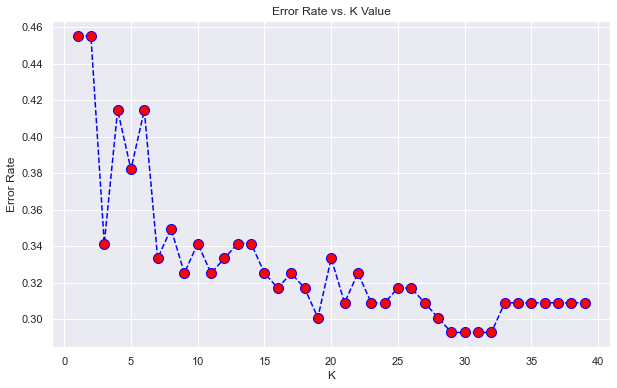

Minimum error:- 0.29268292682926833 at K = 29


In [38]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test_imp)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Now we run we run our knn classifier model with k = 29 as we are getting minimum error at K=29

In [39]:
knn = KNeighborsClassifier(n_neighbors=29, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=29)

In [41]:
y_pred = knn.predict(X_test_imp)

In [42]:
accuracy_score(y_test, y_pred)

0.7073170731707317

We are getting 70% accuarcy with this model, which more than when k = 5 , we might be able to improve this by applying different algorithm.